In [1]:
!pip install qiskit

  Using cached qiskit-0.32.0.tar.gz (13 kB)
  Using cached qiskit_ibmq_provider-0.18.0-py3-none-any.whl (237 kB)
  Using cached qiskit_ignis-0.6.0-py3-none-any.whl (207 kB)
  Using cached qiskit_aqua-0.9.5-py3-none-any.whl (2.1 MB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Using cached docplex-2.22.213.tar.gz (634 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Using cached Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached websocket_client-1.2.1-py2.py3-none-any.whl (52 kB)
  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)
  Using cached fastjsonschema-2.15.1-py3-none-any.whl (21 kB)
  Using cached python-constraint-1.4.0.tar.bz2 (18 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached multitasking-0.0.10.tar.gz (8.2 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Created wheel for qiskit: filename=qiskit-0.32.0-py3-none-any.whl size=11762 sha256=40c1543c9a9249

In [31]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit import BasicAer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector

In [32]:
c = QuantumCircuit(2, 2)

In [33]:
c.draw()

q_0: 
     
q_1: 
     
c: 2/

In [34]:
c.h(0)

In [61]:
def get_result(circuit, simulator, shots):
    from qiskit import transpile
    # compile the circuit down to low-level QASM instructions
    # supported by the backend (not needed for simple circuits)
    compiled_circuit = transpile(circuit, simulator)

    # Execute the circuit on the qasm simulator
    job = simulator.run(compiled_circuit, shots=shots)

    # Grab results from the job
    result = job.result()
    return result

def get_counts(circuit, simulator, shots):
    # Returns counts
    result = get_result(circuit, simulator, shots)
    counts = result.get_counts(circuit)
    return counts

def get_statevector(circuit):
    backend = BasicAer.get_backend('statevector_simulator') # the device to run on
    result = backend.run(transpile(circuit, backend)).result()
    psi  = result.get_statevector(circuit)
    return psi

In [59]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0], [0])

counts = get_counts(circuit, simulator, 100)

# Draw the circuit
circuit.draw()

┌───┐     ┌─┐
q_0: ┤ H ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 2/═══════════╩═
                0

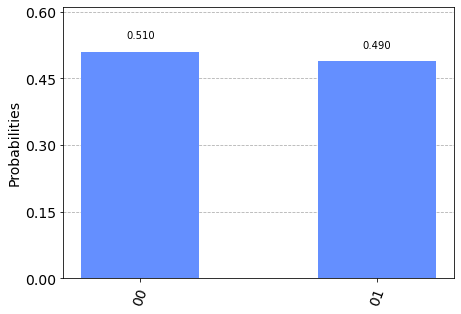

In [60]:
plot_histogram(counts)

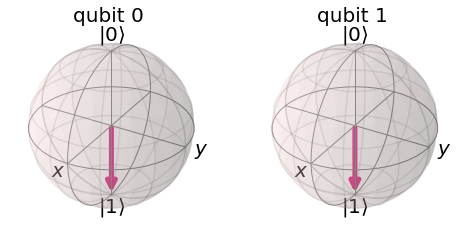

In [67]:
plot_bloch_multivector(get_statevector(circuit))